# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../Part01/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [8]:
len('123')

3

In [9]:
for x in range(len('123')):
    print(x)

0
1
2


In [11]:
#1
"""
Your code here
"""
# def cut_rule(x):
#     for children_number in range(len(x)):
#         if children_number == 0:
#             x[children_number] = 'group1'
#         elif children_number == 1 or children_number ==2:
#             x[children_number] = 'group2'
#         elif children_number >= 3 or children_number <= 5:
#             x[children_number] = 'group3'
#         else:
#             x[children_number] = 'group4'
#         return
            
cut_rule = [-0.1,0.9,2.1,2.9,5,19]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.101, 0.9]    215371
(0.9, 2.1]        87868
(2.9, 5.0]         4230
(5.0, 19.0]          42
(2.1, 2.9]            0
Name: CNT_CHILDREN_GROUP, dtype: int64

In [12]:
#2-1
"""
Your code here
"""
grp = app_train['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
(-0.101, 0.9]    166288.713566
(0.9, 2.1]       174725.712648
(2.1, 2.9]                 NaN
(2.9, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

In [25]:
app_train.groupby(grp)['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN_GROUP,,,,,,,,
"(-0.101, 0.9]",215371.0,166288.713566,104700.345823,25650.0,112500.0,144000.0,202500.0,13500000.0
"(0.9, 2.1]",87868.0,174725.712648,411391.224507,26550.0,112500.0,157500.0,202500.0,117000000.0
"(2.1, 2.9]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2.9, 5.0]",4230.0,173626.303191,112929.960776,29250.0,112500.0,148500.0,202500.0,2250000.0
"(5.0, 19.0]",42.0,147910.714286,72786.394413,45000.0,103500.0,126000.0,193500.0,337500.0


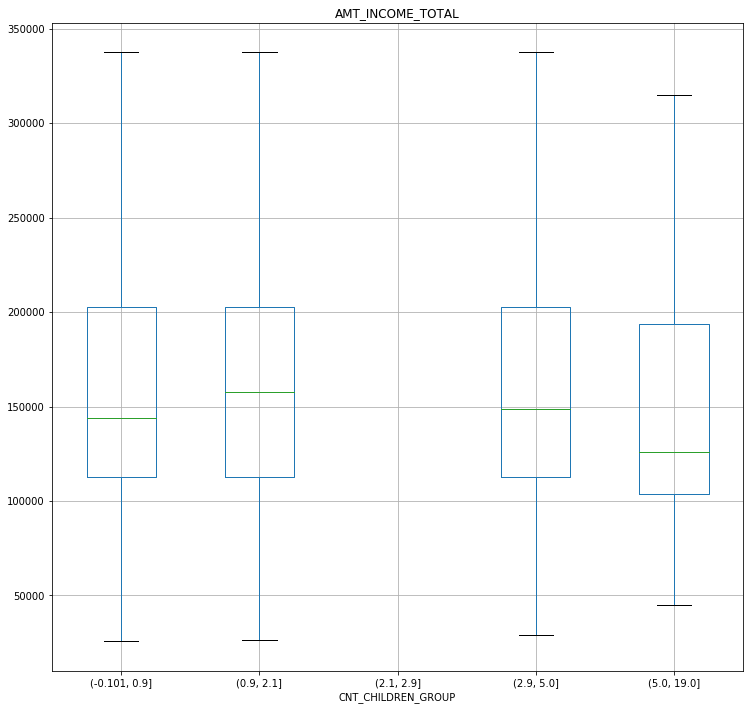

In [27]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [28]:
grouped_df.mean()

CNT_CHILDREN_GROUP
(-0.101, 0.9]    166288.713566
(0.9, 2.1]       174725.712648
(2.1, 2.9]                 NaN
(2.9, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

In [29]:
grouped_df.std()

CNT_CHILDREN_GROUP
(-0.101, 0.9]    104700.345823
(0.9, 2.1]       411391.224507
(2.1, 2.9]                 NaN
(2.9, 5.0]       112929.960776
(5.0, 19.0]       72786.394413
Name: AMT_INCOME_TOTAL, dtype: float64

In [40]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda s:(s-s.mean())/s.std())
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345856
1,270000.0,0.990553
2,67500.0,-0.943538
3,135000.0,-0.298841
4,121500.0,-0.427780
